# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.


In [151]:
import pandas as pd
from datetime import datetime
import numpy as np
from pandas import pivot
import matplotlib as plt

In [37]:
# import pandas as pd                             
df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')
df.head(3)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   vendorid               10000 non-null  int64  
 1   tpep_pickup_datetime   10000 non-null  object 
 2   tpep_dropoff_datetime  10000 non-null  object 
 3   passenger_count        10000 non-null  int64  
 4   trip_distance          10000 non-null  float64
 5   ratecodeid             10000 non-null  int64  
 6   store_and_fwd_flag     10000 non-null  object 
 7   pulocationid           10000 non-null  int64  
 8   dolocationid           10000 non-null  int64  
 9   payment_type           10000 non-null  int64  
 10  fare_amount            10000 non-null  float64
 11  extra                  10000 non-null  float64
 12  mta_tax                10000 non-null  float64
 13  tip_amount             10000 non-null  float64
 14  tolls_amount           10000 non-null  float64
 15  imp

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [18]:
columns = df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']]
columns.describe()

,fare_amount,tip_amount,tolls_amount,total_amount
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.106313,2.634494,0.623447,22.564659
std,13.954762,3.409800,6.437507,19.209255
min,-52.000000,0.000000,-6.120000,-65.920000
25%,7.000000,0.000000,0.000000,12.375000
50%,10.000000,2.000000,0.000000,16.300000
75%,16.000000,3.250000,0.000000,22.880000
max,176.000000,43.000000,612.000000,671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [19]:
df[df.trip_distance==max(df.trip_distance)][['fare_amount','tip_amount','tolls_amount','total_amount']]

,fare_amount,tip_amount,tolls_amount,total_amount
8338,176.0,18.29,6.12,201.21


---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [23]:
meteo_df = pd.read_csv('../data/Meteorite_Landings.csv')
meteo_df.head(3)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"


In [24]:
meteo_df = meteo_df.rename(columns={'mass (g)':'mass'})
meteo_df = meteo_df.drop(columns=['reclat', 'reclong', 'GeoLocation'])
meteo_df.head(3)

,name,id,nametype,recclass,mass,fall,year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM


In [25]:
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      45716 non-null  object 
 1   id        45716 non-null  int64  
 2   nametype  45716 non-null  object 
 3   recclass  45716 non-null  object 
 4   mass      45585 non-null  float64
 5   fall      45716 non-null  object 
 6   year      45425 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.4+ MB


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [26]:
meteo_df['year'] = pd.to_datetime(meteo_df['year'], errors='coerce').dt.year
meteo_df.head(3)

,name,id,nametype,recclass,mass,fall,year
0,Aachen,1,Valid,L5,21.0,Fell,1880.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0


In [27]:
meteo_df["year"] = meteo_df["year"].astype("object")
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      45716 non-null  object 
 1   id        45716 non-null  int64  
 2   nametype  45716 non-null  object 
 3   recclass  45716 non-null  object 
 4   mass      45585 non-null  float64
 5   fall      45716 non-null  object 
 6   year      45404 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.4+ MB


In [28]:
meteo_df['observed_before_1970'] = np.where(meteo_df['year'] < 1970, 'yes', 'no')
meteo_df.head(3)

,name,id,nametype,recclass,mass,fall,year,observed_before_1970
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,yes
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,yes
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,yes


In [29]:
meteo_df.set_index(['id'], inplace=True)
meteo_df.head(3)

,name,nametype,recclass,mass,fall,year,observed_before_1970
id,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,yes
2,Aarhus,Valid,H6,720.0,Fell,1951.0,yes
6,Abee,Valid,EH4,107000.0,Fell,1952.0,yes


In [30]:
meteo_df = meteo_df.sort_index()
meteo_df.head(3)

,name,nametype,recclass,mass,fall,year,observed_before_1970
id,,,,,,,
1,Aachen,Valid,L5,21.0,Fell,1880.0,yes
2,Aarhus,Valid,H6,720.0,Fell,1951.0,yes
4,Abajo,Valid,H5,331.0,Found,1982.0,no


In [31]:
new_meteo = meteo_df.loc[10036:10040]
new_meteo

,name,nametype,recclass,mass,fall,year,observed_before_1970
id,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967.0,yes
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,yes
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,no
10039,Ensisheim,Valid,LL6,127000.0,Fell,NaN,no


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [74]:
met_df = pd.read_csv('../data/Meteorite_Landings.csv', parse_dates=['year'])

In [75]:
met_df['year'] = pd.to_datetime(met_df['year'], errors='coerce').dt.year

In [76]:
cols = ['year']
met_df[cols] = met_df[cols].applymap(lambda x: '{0:.0f}'.format(x))
met_df.head(3)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)"


In [77]:
met_df = met_df.rename(columns={'mass (g)':'mass'})

In [78]:
meteo_pivot = pd.pivot_table(data = met_df, index=['year'], columns=['fall'], 
    values=['name', 'mass'], aggfunc={'name': np.count_nonzero, 'mass': lambda x: np.percentile(x, 95)})
meteo_pivot.loc[(['2005', '2006', '2007', '2008', '2009']), :]

mass          name        
fall      Fell    Found Fell   Found
year                                
2005       NaN      NaN  NaN   875.0
2006   25008.0      NaN  5.0  2451.0
2007   89675.0  1126.90  8.0  1181.0
2008  106000.0  2274.80  9.0   948.0
2009    8333.4  1397.25  5.0  1492.0

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [92]:
met_mass_df = met_df[['mass', 'fall']]
met_mass_df.groupby('fall').describe()

mass                                                             \
         count          mean            std  min     25%     50%      75%   
fall                                                                        
Fell    1075.0  47070.715023  717067.125826  0.1  686.00  2800.0  10450.0   
Found  44510.0  12461.922983  571105.752311  0.0    6.94    30.5    178.0   

                   
              max  
fall               
Fell   23000000.0  
Found  60000000.0

#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [119]:
taxi_df = pd.read_csv('../data/2019_Yellow_Taxi_Trip_Data.csv')

In [102]:
taxi_time = taxi_df[['tpep_dropoff_datetime', 'trip_distance', 'fare_amount', 'tolls_amount', 'tip_amount']]
taxi_time.dtypes

tpep_dropoff_datetime     object
trip_distance            float64
fare_amount              float64
tolls_amount             float64
tip_amount               float64
dtype: object

In [112]:
taxi_time['tpep_dropoff_datetime'] = pd.to_datetime(taxi_time['tpep_dropoff_datetime'], errors='coerce')

<ipython-input-112-f4beddcc48d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_time['tpep_dropoff_datetime'] = pd.to_datetime(taxi_time['tpep_dropoff_datetime'], errors='coerce')


In [114]:
taxi_time = taxi_time.set_index('tpep_dropoff_datetime')

In [129]:
taxi_time_df = taxi_time.resample('H').agg(['sum'])
taxi_time_df.head(3)

,trip_distance,fare_amount,tolls_amount,tip_amount
,sum,sum,sum,sum
tpep_dropoff_datetime,,,,
2019-10-23 07:00:00,0.67,4.5,0.0,0.0
2019-10-23 08:00:00,17.07,62.5,0.0,4.0
2019-10-23 09:00:00,1.58,58.0,0.0,0.0


In [133]:
taxi_time_df.sort_values(by=[('tpep_dropoff_datetime', 'tip_amount')], ascending=False).head(5)

KeyError: ('tpep_dropoff_datetime', 'tip_amount')

--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

In [140]:
tsa_df = pd.read_csv('../data/tsa_melted_holiday_travel.csv', parse_dates=True, index_col='date')
tsa_df.head(3)

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN


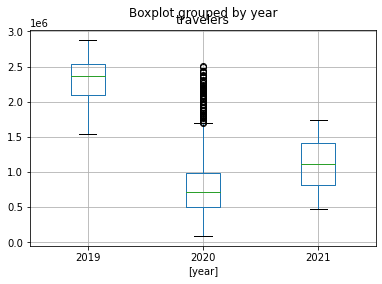

In [153]:
from matplotlib.pyplot import title
boxplot = tsa_df.boxplot(column=['travelers'], by=['year'])


#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.